In [310]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bartlett
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [281]:
pokemon_df = pd.read_csv('./Data/pokemon.csv')  # Откроем датасет
pokemon_df.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [282]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

Можно сразу выдвинуть 2 гипотезы:

* H0 - покемоны класса grass имеют такую же атаку, как и покемоны класса rock
* H1 - покемоны класса grass имеют более сильную атаку, чем покемоны класса rock

У нас всего 2 выборки, можно провести t-test для двух выборок, т.к распредление выборок нормальное.

In [311]:
sort_df = pokemon_df[~
    ((pokemon_df['Class 1'] == 'Rock') & (pokemon_df['Class 2'] == 'Grass')) |
    ((pokemon_df['Class 1'] == 'Grass') & (pokemon_df['Class 2'] == 'Rock'))
]

grass_class = sort_df[(pokemon_df['Class 1'] == 'Grass') | (pokemon_df['Class 2'] == 'Grass')]
rock_class = sort_df[(pokemon_df['Class 1'] == 'Rock') | (pokemon_df['Class 2'] == 'Rock')]

In [312]:
stat, pvalue = stats.ttest_ind(grass_class['Attack'], rock_class['Attack'])

In [285]:
print(f'Среднее значение атаки покемонов класса Grass ' + str(grass_class['Attack'].mean()))
print(f'Среднее значение атаки покемонов класса Rock ' + str(rock_class['Attack'].mean()))
print(f'Pvalue - {pvalue}')

if pvalue > 0.05:
    print('Принимаем нулевую гипотезу о том, что - покемоны класса grass имеют такую же атаку, как и покемоны класса rock')
else:
    print('Принимаем альтернативную гипотезу о том, что - покемоны класса grass имеют более сильную атаку, чем покемоны класса rock')

Среднее значение атаки покемонов класса Grass 73.73118279569893
Среднее значение атаки покемонов класса Rock 91.78571428571429
Pvalue - 0.00027333381459902664
Принимаем альтернативную гипотезу о том, что - покемоны класса grass имеют более сильную атаку, чем покемоны класса rock


Вывод: мы провели тест и получили уровень значимости равный примерно 0.0002, это значит, то что вероятноть получить такие или более экстремальные значения при условии что верна нулевая гипотеза очень маленький.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

Опять же мы выдвигаем 2 гипотезы:
* H0 - покемоны класса Water в среднем одинаковые по скорости с покемонами класса Normal
* H1 - покемоны класса Water в среднем быстрее, чем покемоны класса Normal

У нас всего 2 выборки, можно провести t-test для двух выборок, т.к распредление выборок нормальное.

In [317]:
sort_df = pokemon_df[~
    ((pokemon_df['Class 1'] == 'Water') & (pokemon_df['Class 2'] == 'Normal')) |
    ((pokemon_df['Class 1'] == 'Normal') & (pokemon_df['Class 2'] == 'Water'))
]

water_class = sort_df[(pokemon_df['Class 1'] == 'Water') | (pokemon_df['Class 2'] == 'Water')]
normal_class = sort_df[(pokemon_df['Class 1'] == 'Normal') | (pokemon_df['Class 2'] == 'Normal')]

In [318]:
stat, pvalue = stats.ttest_ind(water_class['Speed'], normal_class['Speed'])

In [316]:
print(f'Среднее значение скорости покемонов класса Grass ' + str(water_class['Speed'].mean()))
print(f'Среднее значение скорости покемонов класса Rock ' + str(normal_class['Speed'].mean()))

print(f'Pvalue - {pvalue}')

if pvalue > 0.05:
    print('Принимаем нулевую гипотезу о том, что - покемоны класса Water в среднем одинаковые по скорости с покемонами класса Normal')
else:
    print('Принимает альтернативную гипотезу о том, что - покемоны класса water в среднем быстрее, чем покемоны класса Normal')

Среднее значение скорости покемонов класса Grass 64.98412698412699
Среднее значение скорости покемонов класса Rock 72.24509803921569
Pvalue - 0.03245358552652923
Принимает альтернативную гипотезу о том, что - покемоны класса water в среднем быстрее, чем покемоны класса Normal


Вывод: мы видим различие в средних значениях и наш тест показал уровень значимости < 0.05

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

Формируем 2 гиптозы:
* H0 - сыворотка не действует на скорость покемонов
* H1 - сыворотка действует на скорость покемонов

Можно провести t-test и узнать, есть ли отличия между покемонами в обычном состояние и под сывороткой.

In [289]:
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

required_n = len(pokemon_df[pokemon_df['Name'].isin(treathed_pokemon)])

control_sample = pokemon_df[~pokemon_df['Name'].isin(treathed_pokemon)].sample(n=required_n, random_state=42)
treatment_sample = pokemon_df[pokemon_df['Name'].isin(treathed_pokemon)]

In [290]:
stats, pvalue = stats.ttest_ind(control_sample['Speed'], treatment_sample['Speed'])

In [319]:
print('Среднее значение скорости покемонов на которых не применялась сыворотка ' + str(control_sample['Speed'].mean()))
print('Среднее значение скорости покемонов на которых применялась сыворотка ' + str(treatment_sample['Speed'].mean()))

print(f'Pvalue - {pvalue}')

if pvalue > 0.05:
    print('Мы принимаем нулевую гипотезу о том, что сыворотка не действует на скорость покемонов')
else:
    print('Мы принимаем альтернативную гипотезу о том, что сыворотка действует на скорость покемонов')

Среднее значение скорости покемонов на которых не применялась сыворотка 80.0
Среднее значение скорости покемонов на которых применялась сыворотка 145.0
Pvalue - 0.03245358552652923
Мы принимаем альтернативную гипотезу о том, что сыворотка действует на скорость покемонов


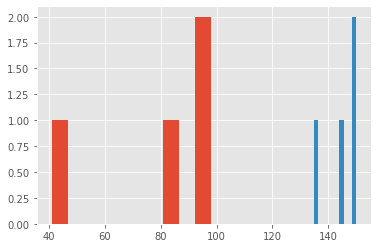

In [292]:
plt.hist(control_sample['Speed']);
plt.hist(treatment_sample['Speed']);

Вывод: если провести такой тест для нашей выборки много раз, то мы практически всегда получим низкий уровень значимости, конечно у нас будут исключения когда у покемонов из выборки для которой не применялась сыворотка скорость будет совпадать с выборкой, где покемонам давали сыворотку. Так же мы можем посмотреть на график и увидеть
значимые отличия.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Составим гипотезы о том, что:
* H0 - сумма характеристик обычных покемонов такая же, как у легендарных
* H1 - сумма характеристик обычных покемонов отличается от легендарных

Составим еще 2 гипотезы, но только с произведением:
* H0 - произведение характеристик обычных покемонов такая же, как у легендарных
* H1 - произведение характеристик обычных покемонов отличается от легендарных

In [293]:
size_legend_pokemon = len(pokemon_df[pokemon_df['Legendary'] == True])

In [294]:
default_sample = pokemon_df[~pokemon_df['Legendary'] == True].sample(n=size_legend_pokemon, random_state=42)
legendary_sample = pokemon_df[pokemon_df['Legendary'] == True]

In [295]:
sum_default_pokemon = default_sample['HP'].sum() + \
                      default_sample['Attack'].sum() + \
                      default_sample['Defense'].sum()

mul_default_pokemon = default_sample['HP'].sum() * \
                      default_sample['Attack'].sum() * \
                      default_sample['Defense'].sum()

In [296]:
sum_legend_pokemon = legendary_sample['HP'].sum() + \
                     legendary_sample['Attack'].sum() + \
                     legendary_sample['Defense'].sum()

mul_legend_pokemon = legendary_sample['HP'].sum() * \
                     legendary_sample['Attack'].sum() * \
                     legendary_sample['Defense'].sum()

In [297]:
print(f'Произведение храктеристик обычных покемонов = {mul_default_pokemon}')
print(f'Сумма характеристик обычных покемонов = {sum_default_pokemon}')
print('===========================================')
print(f'Произведение храктеристик легендарных покемонов = {mul_legend_pokemon}')
print(f'Сумма характеристик легендарных покемонов = {sum_legend_pokemon}')

Произведение храктеристик обычных покемонов = 94541970630
Сумма характеристик обычных покемонов = 13680
Произведение храктеристик легендарных покемонов = 296150528256
Сумма характеристик легендарных покемонов = 20090


In [298]:
if sum_default_pokemon > sum_legend_pokemon:
    print('Сумма характеристик обычный покемонов больше чем у легендарных')
else:
    print('Сумма характеристик легендарных покемонов больше чем у обычных')
    
if mul_default_pokemon > mul_legend_pokemon:
    print('Произведение характеристик обычных покемонов больше чем у легендарных')
else:
    print('Произведение характеристик легендарных покемонов больше чем у обычных')

Сумма характеристик легендарных покемонов больше чем у обычных
Произведение характеристик легендарных покемонов больше чем у обычных


Вывод: в обоих случаях мы можем отклонить нулевую гипотезу, так как сумма и произведение характеристик у легендарных покемонов, больше чем у обычных

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Выдвигаем 2 гипотезы:
* H0 - между классами нет различия в силе защиты 
* H1 - между классами есть различия в силе защиты

Можно провести дисперсионный анализ, т.к выборок больше 2.

In [299]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

In [320]:
min_samples = np.min([
    len(sort_df[(pokemon_df['Class 1'] == 'Rock') | (pokemon_df['Class 2'] == 'Rock')]), 
    len(sort_df[(pokemon_df['Class 1'] == 'Ground') | (pokemon_df['Class 2'] == 'Ground')]),
    len(sort_df[(pokemon_df['Class 1'] == 'Steel') | (pokemon_df['Class 2'] == 'Steel')]),
    len(sort_df[(pokemon_df['Class 1'] == 'Ice') | (pokemon_df['Class 2'] == 'Ice')])
])

In [321]:
rock_class_smaple = sort_df[(pokemon_df['Class 1'] == 'Rock') | (pokemon_df['Class 2'] == 'Rock')].sample(n=min_samples)
ground_class_smaple = sort_df[(pokemon_df['Class 1'] == 'Ground') | (pokemon_df['Class 2'] == 'Ground')].sample(n=min_samples)
steel_class_smaple = sort_df[(pokemon_df['Class 1'] == 'Steel') | (pokemon_df['Class 2'] == 'Steel')].sample(n=min_samples)
ice_class_smaple = sort_df[(pokemon_df['Class 1'] == 'Ice') | (pokemon_df['Class 2'] == 'Ice')].sample(n=min_samples)

In [302]:
rock_class_smaple['Defense'] = rock_class_smaple['Defense'].astype('float64')
ground_class_smaple['Defense'] = ground_class_smaple['Defense'].astype('float64')
steel_class_smaple['Defense'] = steel_class_smaple['Defense'].astype('float64')
ice_class_smaple['Defense'] = ice_class_smaple['Defense'].astype('float64')

In [322]:
stat, pvalue = bartlett(
    rock_class_smaple['Defense'],
    ground_class_smaple['Defense'],
    steel_class_smaple['Defense'],
    ice_class_smaple['Defense']
)

In [323]:
print(f'Pvalue - {pvalue}')

if pvalue > 0.05:
    print(f'Принимает нулевую гипотезу о том что, между классами нет различия в силе защиты')
else:
    print(f'Принимаем альтернативную гипотезу о том что, между классами есть различия в силе защиты')

Pvalue - 0.8944298248477992
Принимает нулевую гипотезу о том что, между классами нет различия в силе защиты


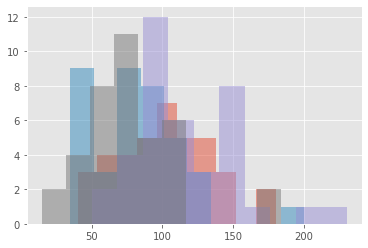

In [324]:
plt.hist(rock_class_smaple['Defense'],alpha=0.5);
plt.hist(ground_class_smaple['Defense'],alpha=0.5);
plt.hist(steel_class_smaple['Defense'],alpha=0.5);
plt.hist(ice_class_smaple['Defense'],alpha=0.5);